In [1]:
import zipfile
import os
from PIL import Image
import numpy as np

# Step 1: Extract the ZIP file
zip_file_path = 'PlantVillageDataset.zip'  # Replace with your ZIP file path
extract_dir = 'ExtractedFiles'  # Directory to extract files

# Extract the ZIP file
if not os.path.exists(extract_dir):  # Avoid re-extraction if already done
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"ZIP file extracted to '{extract_dir}'!")
else:
    print(f"Directory '{extract_dir}' already exists. Skipping extraction.")

Directory 'ExtractedFiles' already exists. Skipping extraction.


In [3]:
# Correct the dataset path
dataset_path = os.path.join(extract_dir, 'PlantVillage')

# Step 2: Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
labels = []

# Debug: Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset folder '{dataset_path}' not found!")

# Loop through extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"Scanning directory: {root}, Found {len(files)} files")  # Debugging line
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  # Support more formats
            file_path = os.path.join(root, file_name)

            try:
                # Load the image
                image = Image.open(file_path).convert('RGB')  
                
                # Resize the image
                image = image.resize(image_size)

                # Convert the image to a NumPy array
                image_array = np.array(image) / 255.0  
                images.append(image_array)

                # Extract label from folder name
                label = os.path.basename(root)  
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Step 3: Print dataset summary
if len(images) > 0:
    print(f"Total images loaded: {len(images)}")
    print(f"Image shape: {images[0].shape} (Each image is resized to {image_size})")
    print(f"Unique labels: {set(labels)}")
else:
    print("No images were loaded. Check the dataset path and file formats.")

Scanning directory: ExtractedFiles\PlantVillage, Found 0 files
Scanning directory: ExtractedFiles\PlantVillage\Pepper__bell___Bacterial_spot, Found 997 files
Scanning directory: ExtractedFiles\PlantVillage\Pepper__bell___healthy, Found 1478 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage, Found 0 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Pepper__bell___Bacterial_spot, Found 997 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Pepper__bell___healthy, Found 1478 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Potato___Early_blight, Found 1000 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Potato___healthy, Found 152 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Potato___Late_blight, Found 1000 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Tomato_Bacterial_spot, Found 2127 files
Scanning directory: ExtractedFiles\PlantVillage\PlantVillage\Tomato_Ea

In [5]:
import tensorflow as tf

# Correct dataset folder path
dataset_folder = "ExtractedFiles/PlantVillage"  # Ensure this points to the folder with class subdirectories

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use 20% of data for validation
    subset="training",      # Load training subset
    seed=123,               # Seed for reproducibility
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Batch size
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use the same split percentage
    subset="validation",    # Load validation subset
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Display class names detected
print(f"Class names: {train_dataset.class_names}")

Found 41276 files belonging to 16 classes.
Using 33021 files for training.
Found 41276 files belonging to 16 classes.
Using 8255 files for validation.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [7]:
import tensorflow as tf

# Directory where the dataset is located (same directory as notebook)
dataset_folder = "ExtractedFiles/PlantVillage"  # folder name

# Load and resize dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Number of images per batch
)

# Display dataset information
print(f"Dataset loaded with class names: {dataset.class_names}")

# Verify resizing
for images, labels in dataset.take(1):
    print(f"Batch image shape: {images.shape}")

Found 41276 files belonging to 16 classes.
Dataset loaded with class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Batch image shape: (32, 128, 128, 3)


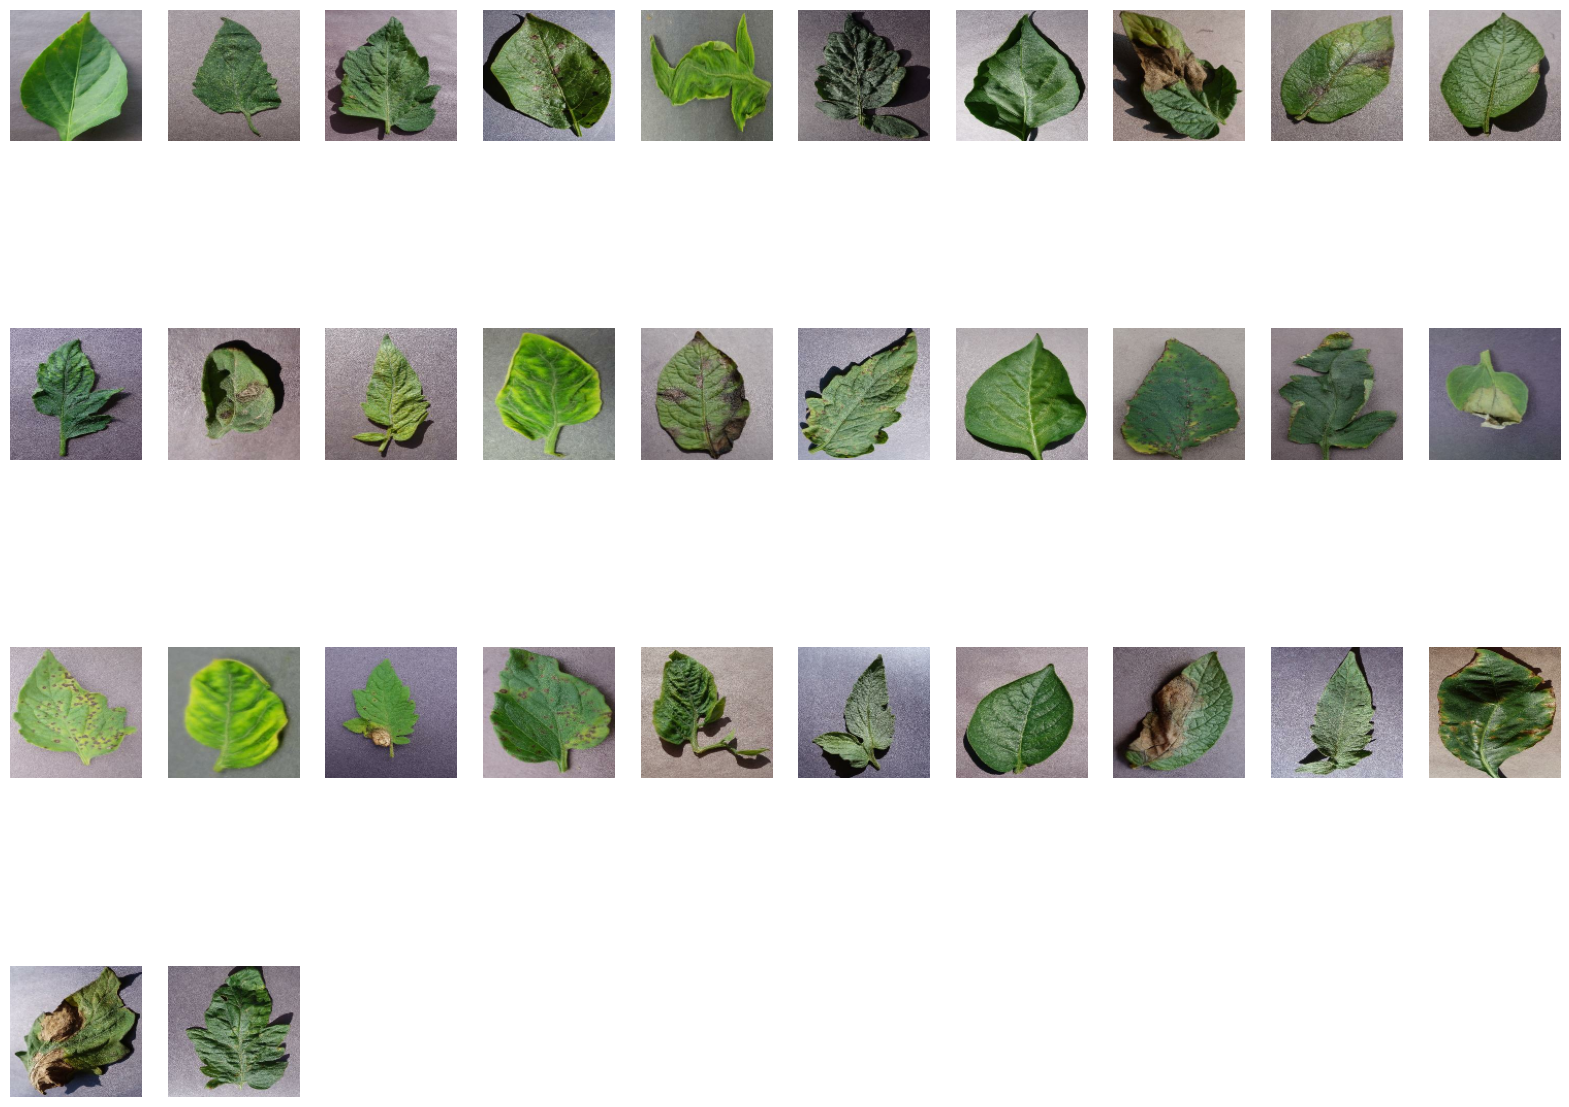

In [9]:
import matplotlib.pyplot as plt

# Display resized images
for images, labels in train_dataset.take(1):  # Take one batch from the dataset
    plt.figure(figsize=(20, 20))
    
    num_images = min(50, images.shape[0])  # Ensure we don't exceed batch size
    for i in range(num_images):  # Loop over available images
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    
    plt.show()

In [11]:
import tensorflow as tf

# Load dataset from a directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "ExtractedFiles/plantVillage",  # Replace with your dataset directory
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32          # Specify batch size
)

# Normalize pixel values in the dataset
normalized_dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Verify normalization
for images, labels in normalized_dataset.take(1):
    print(f"Image pixel range: {tf.reduce_min(images)} to {tf.reduce_max(images)}")

Found 41276 files belonging to 16 classes.
Image pixel range: 0.0 to 0.977450966835022


In [13]:
def handle_color_channels(image, label):
    # Split the color channels
    red_channel = image[:, :, :, 0]  # Red channel
    green_channel = image[:, :, :, 1]  # Green channel
    blue_channel = image[:, :, :, 2]  # Blue channel

    # Example: Set the Red channel to zero
    red_channel = tf.zeros_like(red_channel)

    # Stack the modified channels back together
    image = tf.stack([red_channel, green_channel, blue_channel], axis=-1)

    # Return the processed image and label
    return image, label

In [15]:
# Apply the handle_color_channels function to the dataset
processed_dataset = dataset.map(handle_color_channels)

# Prefetch the dataset to optimize performance
processed_dataset = processed_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..217.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..223.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..219.25].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..220.0].


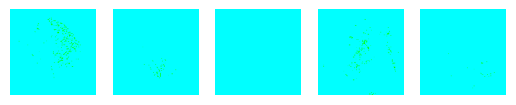

In [17]:
# Visualize a few images from the processed dataset
for images, labels in processed_dataset.take(1):  # Take one batch
    for i in range(5):  # Show the first 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.axis('off')
    plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import os
import tensorflow as tf
from PIL import Image

# Correct dataset folder
dataset_folder = "ExtractedFiles/PlantVillage"

# Function to check and remove corrupt images
def clean_dataset(folder):
    removed_files = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify if the image is not corrupted
            except (IOError, SyntaxError):
                print(f"Removing corrupt file: {file_path}")
                os.remove(file_path)
                removed_files += 1
    print(f"Total corrupt images removed: {removed_files}")

# Clean dataset before loading
clean_dataset(dataset_folder)

# Reload the dataset with corrected path
def load_dataset(folder, image_size=(128, 128), batch_size=32, subset="training"):
    return tf.keras.preprocessing.image_dataset_from_directory(
        folder,  # Root directory where class folders are located
        image_size=image_size,
        batch_size=batch_size,
        validation_split=0.2,
        subset=subset,
        seed=123
    )

train_dataset = load_dataset(dataset_folder, subset="training")
validation_dataset = load_dataset(dataset_folder, subset="validation")

# Ensure the dataset has multiple classes
num_classes = len(train_dataset.class_names)
if num_classes < 2:
    raise ValueError("Dataset has only one class. Ensure subdirectories for each class.")

print(f"Classes detected: {train_dataset.class_names}")

# Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Proceed with model training...

Total corrupt images removed: 0
Found 41276 files belonging to 16 classes.
Using 33021 files for training.
Found 41276 files belonging to 16 classes.
Using 8255 files for validation.
Classes detected: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [23]:
num_classes = len(train_dataset.class_names)
print(f"Number of classes detected: {num_classes}")

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [25]:
# Set training parameters
epochs = 20  # You can adjust this based on performance
batch_size = 32  # Same as used in dataset loading

history = model.fit(
    train_dataset,  
    validation_data=validation_dataset,  
    epochs=epochs  
)


# Save the trained model
model.save("cnn_model.h5")
print("Model saved successfully!")

Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 393s 379ms/step - accuracy: 0.4467 - loss: 4.0893 - val_accuracy: 0.5055 - val_loss: 1.6187
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 396s 384ms/step - accuracy: 0.4965 - loss: 1.7512 - val_accuracy: 0.5061 - val_loss: 1.4933
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 525s 464ms/step - accuracy: 0.4921 - loss: 1.6272 - val_accuracy: 0.5058 - val_loss: 1.4173
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 453s 439ms/step - accuracy: 0.4916 - loss: 1.5823 - val_accuracy: 0.5059 - val_loss: 1.3691
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 421s 407ms/step - accuracy: 0.4909 - loss: 1.5245 - val_accuracy: 0.5030 - val_loss: 1.4684
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 389s 376ms/step - accuracy: 0.4900 - loss: 1.4620 - val_accuracy: 0.5049 - val_loss: 1.2832
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 389s 376ms/step - accuracy: 0.4927 - loss: 1.4027 - val_accuracy: 0.5030 - val_loss: 1.2981
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 389s 377ms/step - ac

Model saved successfully!


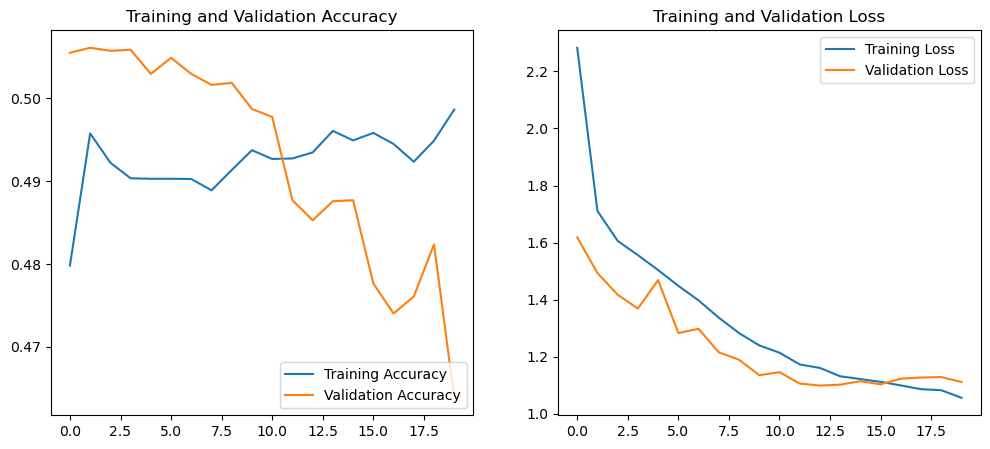

In [27]:
# Extract values from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in validation_dataset:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


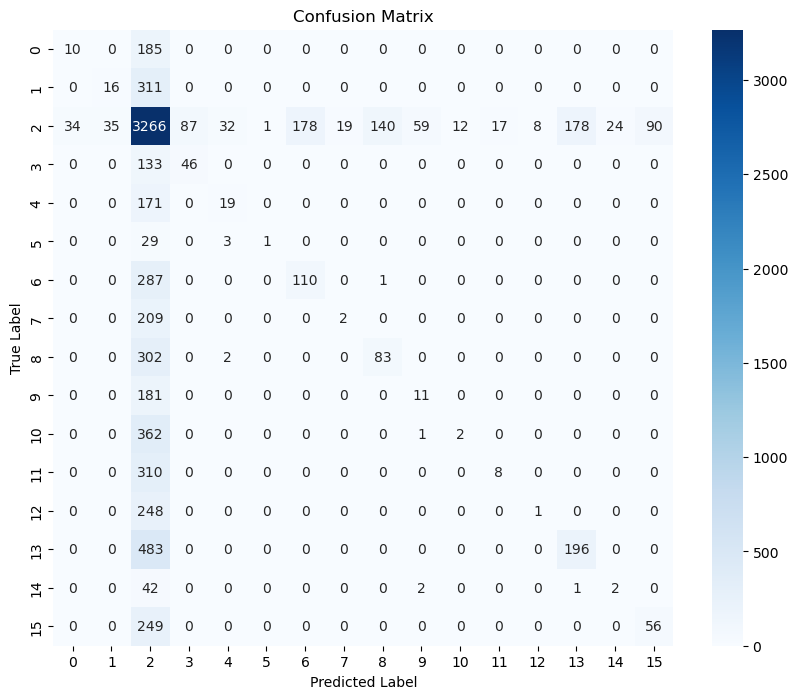

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.05      0.08       195
           1       0.31      0.05      0.08       327
           2       0.48      0.78      0.60      4180
           3       0.35      0.26      0.29       179
           4       0.34      0.10      0.15       190
           5       0.50      0.03      0.06        33
           6       0.38      0.28      0.32       398
           7       0.10      0.01      0.02       211
           8       0.37      0.21      0.27       387
           9       0.15      0.06      0.08       192
          10       0.14      0.01      0.01       365
          11       0.32      0.03      0.05       318
          12       0.11      0.00      0.01       249
          13       0.52      0.29      0.37       679
          14       0.08      0.04      0.05        47
          15       0.38      0.18      0.25       305

    accuracy                           0.46      8255
  

In [33]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation transformations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply augmentation to the training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [37]:
from sklearn.utils.class_weight import compute_class_weight

# Get label distribution
label_counts = np.bincount(y_true)
total_samples = sum(label_counts)
num_classes = len(label_counts)

# Compute class weights
class_weights = {i: total_samples / (num_classes * count) for i, count in enumerate(label_counts)}
print("Class Weights:", class_weights)

Class Weights: {0: 2.6458333333333335, 1: 1.5777905198776758, 2: 0.12343002392344497, 3: 2.882332402234637, 4: 2.7154605263157894, 5: 15.634469696969697, 6: 1.296325376884422, 7: 2.445201421800948, 8: 1.333171834625323, 9: 2.6871744791666665, 10: 1.413527397260274, 11: 1.6224449685534592, 12: 2.0720381526104417, 13: 0.7598490427098674, 14: 10.977393617021276, 15: 1.6915983606557377}


In [41]:
# Train the model with augmented dataset and class weights
history = model.fit(
    augmented_train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    class_weight=class_weights  # Apply class weights
)

Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 437s 423ms/step - accuracy: 0.2586 - loss: 2.7477 - val_accuracy: 0.2718 - val_loss: 2.7432
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 443s 429ms/step - accuracy: 0.2147 - loss: 2.0779 - val_accuracy: 0.2917 - val_loss: 2.3111
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 438s 424ms/step - accuracy: 0.2445 - loss: 1.7865 - val_accuracy: 0.3176 - val_loss: 2.2848
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 446s 432ms/step - accuracy: 0.2697 - loss: 1.6207 - val_accuracy: 0.3116 - val_loss: 2.2854
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 445s 431ms/step - accuracy: 0.2892 - loss: 1.4763 - val_accuracy: 0.3177 - val_loss: 2.2704
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 445s 430ms/step - accuracy: 0.2743 - loss: 1.6230 - val_accuracy: 0.3227 - val_loss: 2.1310
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 441s 427ms/step - accuracy: 0.2933 - loss: 1.4309 - val_accuracy: 0.3090 - val_loss: 2.1029
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 439s 425ms/step - ac

In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 as the feature extractor (without top classification layer)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model (prevents re-training existing weights)
base_model.trainable = False

# Create a new classifier head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [45]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 as the feature extractor (without top classification layer)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model (prevents re-training existing weights)
base_model.trainable = False

# Create a new classifier head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [47]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Fewer epochs since the model is already trained on general features
)

Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 329s 319ms/step - accuracy: 0.4280 - loss: 1.3254 - val_accuracy: 0.4665 - val_loss: 1.0826
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 330s 320ms/step - accuracy: 0.4627 - loss: 1.1319 - val_accuracy: 0.4686 - val_loss: 1.0454
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 331s 321ms/step - accuracy: 0.4717 - loss: 1.0871 - val_accuracy: 0.4723 - val_loss: 1.0303
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 332s 321ms/step - accuracy: 0.4873 - loss: 1.0483 - val_accuracy: 0.4618 - val_loss: 1.0208
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 340s 330ms/step - accuracy: 0.4892 - loss: 1.0347 - val_accuracy: 0.4675 - val_loss: 1.0429
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 336s 326ms/step - accuracy: 0.4873 - loss: 1.0192 - val_accuracy: 0.4655 - val_loss: 1.0761
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 337s 327ms/step - accuracy: 0.4921 - loss: 0.9966 - val_accuracy: 0.4640 - val_loss: 1.0565
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 340s 329ms/step - ac

In [49]:
# Unfreeze some layers of the base model
base_model.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train again with fine-tuning
history_finetune = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 387s 373ms/step - accuracy: 0.4966 - loss: 0.9610 - val_accuracy: 0.4291 - val_loss: 1.0869
Epoch 2/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 388s 376ms/step - accuracy: 0.5051 - loss: 0.8991 - val_accuracy: 0.4178 - val_loss: 1.0981
Epoch 3/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 389s 377ms/step - accuracy: 0.5005 - loss: 0.8974 - val_accuracy: 0.4111 - val_loss: 1.1040
Epoch 4/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 386s 374ms/step - accuracy: 0.4960 - loss: 0.8953 - val_accuracy: 0.4079 - val_loss: 1.1056
Epoch 5/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 393s 380ms/step - accuracy: 0.5066 - loss: 0.8876 - val_accuracy: 0.4035 - val_loss: 1.1090


In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to generate Grad-CAM heatmaps
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Create a model that maps the input image to the activations and predictions
    grad_model = Model(
        inputs=model.input, 
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients of the predicted class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by the importance weight
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [53]:
import cv2

# Load an image from the validation dataset
img_path = "path_to_test_image.jpg"  # Replace with an actual image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, "conv5_block3_out")  # Change based on model architecture

# Superimpose heatmap on the image
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

# Display the result
plt.imshow(superimposed_img)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_test_image.jpg'